# **Import packages**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# **Load the dataset in dataframe(df)**

In [2]:
df=pd.read_csv('/content/anime.csv')

In [3]:
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


# **data Preprocessing**

In [4]:
df.shape

(12294, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [6]:
df.isna().sum()

,0
anime_id,0
name,0
genre,62
type,25
episodes,0
rating,230
members,0


In [7]:
df['anime_id'].value_counts()

,count
anime_id,
26081,1
32281,1
5114,1
28977,1
9253,1
...,...
4181,1
15417,1
15335,1


In [8]:
df['episodes'].value_counts().head(60)

,count
episodes,
1,5677
2,1076
12,816
13,572
26,514
3,505
Unknown,340
4,327
6,268


In [9]:
df['episodes'].tail(60)

,episodes
12234,1
12235,1
12236,2
12237,1
12238,1
12239,2
12240,1
12241,1
12242,1
12243,1


In [10]:
df['episodes'].unique()#Unknown(Object datatype)

array(['1', '64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '99',
       'Unknown', '39', '101', '47', '50', '62', '33', '112', '23', '3',
       '94', '6', '8', '14', '7', '40', '15', '203', '77', '291', '120',
       '102', '96', '38', '79', '175', '103', '70', '153', '45', '5',
       '21', '63', '52', '28', '145', '36', '69', '60', '178', '114',
       '35', '61', '34', '109', '20', '9', '49', '366', '97', '48', '78',
       '358', '155', '104', '113', '54', '167', '161', '42', '142', '31',
       '373', '220', '46', '195', '17', '1787', '73', '147', '127', '16',
       '19', '98', '150', '76', '53', '124', '29', '115', '224', '44',
       '58', '93', '154', '92', '67', '172', '86', '30', '276', '59',
       '72', '330', '41', '105', '128', '137', '56', '55', '65', '243',
       '193', '18', '191', '180', '91', '192', '66', '182', '32', '164',
       '100', '296', '694', '95', '68', '117', '151', '130',

In [11]:
df['genre'].value_counts()

,count
genre,
Hentai,823
Comedy,523
Music,301
Kids,199
"Comedy, Slice of Life",179
...,...
"Hentai, Parody, Sci-Fi",1
"Hentai, Historical, Mystery",1
"Action, Comedy, Hentai",1


In [12]:
df['genre'].unique()

array(['Drama, Romance, School, Supernatural',
       'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen',
       'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen',
       ..., 'Hentai, Sports', 'Drama, Romance, School, Yuri',
       'Hentai, Slice of Life'], dtype=object)

In [13]:
df['members'].value_counts()

,count
members,
60,36
72,36
74,33
62,32
103,31
...,...
1310,1
1922,1
75894,1


In [14]:
df['name'].value_counts()

,count
name,
Saru Kani Gassen,2
Shi Wan Ge Leng Xiaohua,2
Bary-san x Gospe Rats: Tonde Bary Bary Monogatari,1
Ba La La Xiao Mo Xian Zhi: Qiji Wubu,1
Backkom Meogeujan Yeohaeng,1
...,...
3-gatsu no Lion meets Bump of Chicken,1
Bannou Bunka Neko-Musume,1
Choujikuu Seiki Orguss,1


In [15]:
df['rating'].value_counts()

,count
rating,
6.00,141
7.00,99
6.50,90
6.25,84
5.00,76
...,...
2.98,1
3.44,1
1.92,1


In [16]:
df['rating'].tail(60)

,rating
12234,4.94
12235,4.94
12236,4.93
12237,4.88
12238,4.88
12239,4.80
12240,4.77
12241,4.71
12242,4.69
12243,4.64


In [17]:
df['type'].value_counts()

,count
type,
TV,3787
OVA,3311
Movie,2348
Special,1676
ONA,659
Music,488


# **Filling Missing Values**

In [18]:
df['rating'].mean()

np.float64(6.473901690981432)

In [19]:
df['rating'].fillna(df['rating'].mean(),inplace=True)

/tmp/ipython-input-3424798236.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna(df['rating'].mean(),inplace=True)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12294 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [21]:
df['genre'].mode()[0]

'Hentai'

In [22]:
df['genre'].fillna(df['genre'].mode()[0],inplace=True)

/tmp/ipython-input-2221661984.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['genre'].fillna(df['genre'].mode()[0],inplace=True)


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12294 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12294 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [24]:
df['type'].mode()[0]

'TV'

In [25]:
df['type'].fillna(df['type'].mode()[0],inplace=True)

/tmp/ipython-input-1828210288.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['type'].fillna(df['type'].mode()[0],inplace=True)


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12294 non-null  object 
 3   type      12294 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12294 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [27]:
df.duplicated().sum()

np.int64(0)

# **Scaling down the data**

In [28]:
sc=StandardScaler()
df['members']=sc.fit_transform(df[['members']])

In [29]:
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,3.330241
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,14.148406
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,1.754713
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,11.957666
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,2.429742
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,-0.325809
12290,5543,Under World,Hentai,OVA,1,4.28,-0.326320
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,-0.325663
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,-0.326466


In [30]:
df['episodes'] = df['episodes'].replace('Unknown', np.nan)

In [31]:
df['episodes'] = df['episodes'].astype(float)

In [32]:
df['episodes'].head(60)

,episodes
0,1.0
1,64.0
2,51.0
3,24.0
4,51.0
5,10.0
6,148.0
7,110.0
8,1.0
9,13.0


In [33]:
df['episodes'].tail(60)

,episodes
12234,1.0
12235,1.0
12236,2.0
12237,1.0
12238,1.0
12239,2.0
12240,1.0
12241,1.0
12242,1.0
12243,1.0


In [34]:
df['episodes'].unique()

array([1.000e+00, 6.400e+01, 5.100e+01, 2.400e+01, 1.000e+01, 1.480e+02,
       1.100e+02, 1.300e+01, 2.010e+02, 2.500e+01, 2.200e+01, 7.500e+01,
       4.000e+00, 2.600e+01, 1.200e+01, 2.700e+01, 4.300e+01, 7.400e+01,
       3.700e+01, 2.000e+00, 1.100e+01, 9.900e+01,       nan, 3.900e+01,
       1.010e+02, 4.700e+01, 5.000e+01, 6.200e+01, 3.300e+01, 1.120e+02,
       2.300e+01, 3.000e+00, 9.400e+01, 6.000e+00, 8.000e+00, 1.400e+01,
       7.000e+00, 4.000e+01, 1.500e+01, 2.030e+02, 7.700e+01, 2.910e+02,
       1.200e+02, 1.020e+02, 9.600e+01, 3.800e+01, 7.900e+01, 1.750e+02,
       1.030e+02, 7.000e+01, 1.530e+02, 4.500e+01, 5.000e+00, 2.100e+01,
       6.300e+01, 5.200e+01, 2.800e+01, 1.450e+02, 3.600e+01, 6.900e+01,
       6.000e+01, 1.780e+02, 1.140e+02, 3.500e+01, 6.100e+01, 3.400e+01,
       1.090e+02, 2.000e+01, 9.000e+00, 4.900e+01, 3.660e+02, 9.700e+01,
       4.800e+01, 7.800e+01, 3.580e+02, 1.550e+02, 1.040e+02, 1.130e+02,
       5.400e+01, 1.670e+02, 1.610e+02, 4.200e+01, 

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12294 non-null  object 
 3   type      12294 non-null  object 
 4   episodes  11954 non-null  float64
 5   rating    12294 non-null  float64
 6   members   12294 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 672.5+ KB


<Axes: >

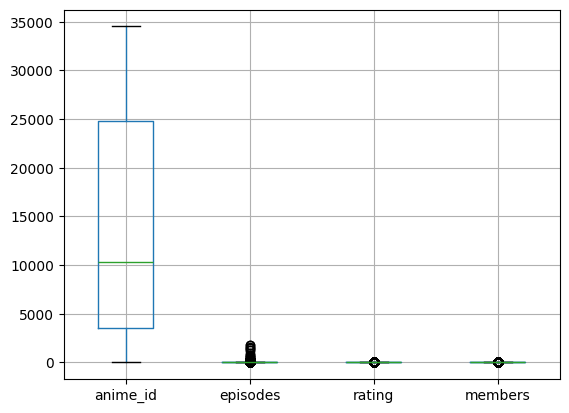

In [36]:
df.boxplot()

In [37]:
df['episodes'].median()

2.0

In [38]:
df['episodes'].fillna(df['episodes'].median(),inplace=True)

/tmp/ipython-input-3330393750.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['episodes'].fillna(df['episodes'].median(),inplace=True)


In [39]:
df.isna().sum()

,0
anime_id,0
name,0
genre,0
type,0
episodes,0
rating,0
members,0


<Axes: >

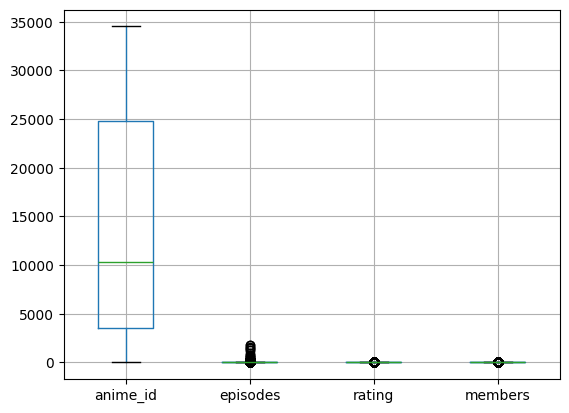

In [40]:
df.boxplot()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12294 non-null  object 
 3   type      12294 non-null  object 
 4   episodes  12294 non-null  float64
 5   rating    12294 non-null  float64
 6   members   12294 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 672.5+ KB


In [42]:
df['episodes'].unique()

array([1.000e+00, 6.400e+01, 5.100e+01, 2.400e+01, 1.000e+01, 1.480e+02,
       1.100e+02, 1.300e+01, 2.010e+02, 2.500e+01, 2.200e+01, 7.500e+01,
       4.000e+00, 2.600e+01, 1.200e+01, 2.700e+01, 4.300e+01, 7.400e+01,
       3.700e+01, 2.000e+00, 1.100e+01, 9.900e+01, 3.900e+01, 1.010e+02,
       4.700e+01, 5.000e+01, 6.200e+01, 3.300e+01, 1.120e+02, 2.300e+01,
       3.000e+00, 9.400e+01, 6.000e+00, 8.000e+00, 1.400e+01, 7.000e+00,
       4.000e+01, 1.500e+01, 2.030e+02, 7.700e+01, 2.910e+02, 1.200e+02,
       1.020e+02, 9.600e+01, 3.800e+01, 7.900e+01, 1.750e+02, 1.030e+02,
       7.000e+01, 1.530e+02, 4.500e+01, 5.000e+00, 2.100e+01, 6.300e+01,
       5.200e+01, 2.800e+01, 1.450e+02, 3.600e+01, 6.900e+01, 6.000e+01,
       1.780e+02, 1.140e+02, 3.500e+01, 6.100e+01, 3.400e+01, 1.090e+02,
       2.000e+01, 9.000e+00, 4.900e+01, 3.660e+02, 9.700e+01, 4.800e+01,
       7.800e+01, 3.580e+02, 1.550e+02, 1.040e+02, 1.130e+02, 5.400e+01,
       1.670e+02, 1.610e+02, 4.200e+01, 1.420e+02, 

In [43]:
df['anime_id'].unique().sum()

np.int64(172831777)

In [44]:
df[df['anime_id']==5621]

,anime_id,name,genre,type,episodes,rating,members
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4.0,4.88,-0.325663


In [45]:
df.sort_values('anime_id')

,anime_id,name,genre,type,episodes,rating,members
22,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26.0,8.820000,8.551002
152,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1.0,8.400000,2.181103
214,6,Trigun,"Action, Comedy, Sci-Fi",TV,26.0,8.320000,4.834096
2095,7,Witch Hunter Robin,"Action, Drama, Magic, Mystery, Police, Superna...",TV,26.0,7.360000,0.854341
3159,8,Beet the Vandel Buster,"Adventure, Fantasy, Shounen, Supernatural",TV,52.0,7.060000,-0.150010
...,...,...,...,...,...,...,...
2726,34514,Pokemon Generations,"Action, Adventure, Fantasy, Game, Kids",ONA,18.0,7.210000,-0.324277
9586,34519,Mobile Suit Gakuen: G-Reco Koushien,Comedy,Special,9.0,5.670000,-0.327943
11104,34522,"Wake Up, Girls! Shin Shou","Drama, Music",TV,2.0,6.473902,-0.322708
10952,34525,Centaur no Nayami,"Comedy, Fantasy, Slice of Life, Supernatural",TV,2.0,6.473902,-0.327688


In [46]:
len(df['anime_id'].unique())

12294

In [47]:
# new_df=df.pivot(index='anime_id',columns='name',values='rating')

In [48]:
# new_df

In [49]:
# type_encoded=pd.get_dummies(df,columns=['type'])

In [50]:
# type_encoded

In [51]:
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,3.330241
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,14.148406
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.25,1.754713
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24.0,9.17,11.957666
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.16,2.429742
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1.0,4.15,-0.325809
12290,5543,Under World,Hentai,OVA,1.0,4.28,-0.326320
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4.0,4.88,-0.325663
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1.0,4.98,-0.326466


# **Use three columns as type, episodes, rating**

In [52]:
genre_dummies = df['genre'].fillna('Unknown').str.get_dummies(sep=', ')

In [53]:
genre_dummies

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
df['type_encoded'] = LabelEncoder().fit_transform(df['type'].fillna('Unknown'))

In [56]:
df['type_encoded']

,type_encoded
0,0
1,5
2,5
3,5
4,5
...,...
12289,3
12290,3
12291,3
12292,3


In [57]:
Features = pd.concat([df[['name','episodes', 'rating', 'type_encoded']], genre_dummies], axis=1)

In [58]:
Features

,name,episodes,rating,type_encoded,Action,Adventure,Cars,Comedy,Dementia,Demons,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,Kimi no Na wa.,1.0,9.37,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,Fullmetal Alchemist: Brotherhood,64.0,9.26,5,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Gintama°,51.0,9.25,5,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Steins;Gate,24.0,9.17,5,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,Gintama&#039;,51.0,9.16,5,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,Toushindai My Lover: Minami tai Mecha-Minami,1.0,4.15,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12290,Under World,1.0,4.28,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12291,Violence Gekiga David no Hoshi,4.0,4.88,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12292,Violence Gekiga Shin David no Hoshi: Inma Dens...,1.0,4.98,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
from sklearn.metrics.pairwise import cosine_similarity

In [60]:
# feature_matrix = Features.pivot(index='name', columns=None, values=None)

In [61]:
# new_df=df.pivot(index='episodes',columns='',values='rating')

In [62]:
feature_matrix = Features.set_index('name')

In [63]:
cos_sim = cosine_similarity(feature_matrix)
cos_sim_df = pd.DataFrame(cos_sim, index=feature_matrix.index, columns=feature_matrix.index)

In [64]:
# from sklearn.metrics import pairwise_distances
# user_sim=1-pairwise_distances(new_df.values,metric='cosine')

In [65]:
cos_sim_df

name,Kimi no Na wa.,Fullmetal Alchemist: Brotherhood,Gintama°,Steins;Gate,Gintama&#039;,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou,Hunter x Hunter (2011),Ginga Eiyuu Densetsu,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare,Gintama&#039;: Enchousen,...,Super Erotic Anime,Taimanin Asagi 3,Teleclub no Himitsu,Tenshi no Habataki Jun,The Satisfaction,Toushindai My Lover: Minami tai Mecha-Minami,Under World,Violence Gekiga David no Hoshi,Violence Gekiga Shin David no Hoshi: Inma Densetsu,Yasuji no Pornorama: Yacchimae!!
name,,,,,,,,,,,,,,,,,,,,,
Kimi no Na wa.,1.000000,0.242702,0.274101,0.435326,0.272505,0.694002,0.163394,0.184578,0.939747,0.605901,...,0.780199,0.868402,0.793787,0.791225,0.793729,0.779382,0.788030,0.731368,0.826927,0.960019
Fullmetal Alchemist: Brotherhood,0.242702,1.000000,0.997660,0.967312,0.997718,0.792140,0.995095,0.996180,0.242918,0.862362,...,0.488087,0.410837,0.479461,0.336377,0.335467,0.340521,0.337521,0.690136,0.322129,0.312899
Gintama°,0.274101,0.997660,1.000000,0.976669,0.999999,0.815535,0.990046,0.991695,0.286145,0.886878,...,0.521746,0.445796,0.513441,0.372920,0.372051,0.376861,0.374010,0.717773,0.359217,0.345164
Steins;Gate,0.435326,0.967312,0.976669,1.000000,0.976363,0.910492,0.941212,0.946373,0.434154,0.954284,...,0.681151,0.613439,0.674655,0.550512,0.549870,0.553349,0.551308,0.841866,0.539836,0.500994
Gintama&#039;,0.272505,0.997718,0.999999,0.976363,1.000000,0.814703,0.990242,0.991855,0.284584,0.886215,...,0.520584,0.444463,0.512250,0.371663,0.370789,0.375627,0.372759,0.716798,0.357889,0.343597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Toushindai My Lover: Minami tai Mecha-Minami,0.779382,0.340521,0.376861,0.553349,0.375627,0.810827,0.254851,0.267275,0.765729,0.735052,...,0.986426,0.961386,0.987112,0.999788,0.999687,1.000000,0.999888,0.913505,0.996243,0.822972
Under World,0.788030,0.337521,0.374010,0.551308,0.372759,0.810555,0.251520,0.264212,0.774209,0.734162,...,0.986191,0.963672,0.987225,0.999984,0.999950,0.999888,1.000000,0.912869,0.997429,0.830686
Violence Gekiga David no Hoshi,0.731368,0.690136,0.717773,0.841866,0.716798,0.965792,0.622158,0.633087,0.719735,0.937079,...,0.967862,0.923332,0.965776,0.912578,0.912328,0.913505,0.912869,1.000000,0.906994,0.794936


In [66]:
np.fill_diagonal(cos_sim_df.values,0)

In [67]:
cos_sim_df

name,Kimi no Na wa.,Fullmetal Alchemist: Brotherhood,Gintama°,Steins;Gate,Gintama&#039;,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou,Hunter x Hunter (2011),Ginga Eiyuu Densetsu,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare,Gintama&#039;: Enchousen,...,Super Erotic Anime,Taimanin Asagi 3,Teleclub no Himitsu,Tenshi no Habataki Jun,The Satisfaction,Toushindai My Lover: Minami tai Mecha-Minami,Under World,Violence Gekiga David no Hoshi,Violence Gekiga Shin David no Hoshi: Inma Densetsu,Yasuji no Pornorama: Yacchimae!!
name,,,,,,,,,,,,,,,,,,,,,
Kimi no Na wa.,0.000000,0.242702,0.274101,0.435326,0.272505,0.694002,0.163394,0.184578,0.939747,0.605901,...,0.780199,0.868402,0.793787,0.791225,0.793729,0.779382,0.788030,0.731368,0.826927,0.960019
Fullmetal Alchemist: Brotherhood,0.242702,0.000000,0.997660,0.967312,0.997718,0.792140,0.995095,0.996180,0.242918,0.862362,...,0.488087,0.410837,0.479461,0.336377,0.335467,0.340521,0.337521,0.690136,0.322129,0.312899
Gintama°,0.274101,0.997660,0.000000,0.976669,0.999999,0.815535,0.990046,0.991695,0.286145,0.886878,...,0.521746,0.445796,0.513441,0.372920,0.372051,0.376861,0.374010,0.717773,0.359217,0.345164
Steins;Gate,0.435326,0.967312,0.976669,0.000000,0.976363,0.910492,0.941212,0.946373,0.434154,0.954284,...,0.681151,0.613439,0.674655,0.550512,0.549870,0.553349,0.551308,0.841866,0.539836,0.500994
Gintama&#039;,0.272505,0.997718,0.999999,0.976363,0.000000,0.814703,0.990242,0.991855,0.284584,0.886215,...,0.520584,0.444463,0.512250,0.371663,0.370789,0.375627,0.372759,0.716798,0.357889,0.343597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Toushindai My Lover: Minami tai Mecha-Minami,0.779382,0.340521,0.376861,0.553349,0.375627,0.810827,0.254851,0.267275,0.765729,0.735052,...,0.986426,0.961386,0.987112,0.999788,0.999687,0.000000,0.999888,0.913505,0.996243,0.822972
Under World,0.788030,0.337521,0.374010,0.551308,0.372759,0.810555,0.251520,0.264212,0.774209,0.734162,...,0.986191,0.963672,0.987225,0.999984,0.999950,0.999888,0.000000,0.912869,0.997429,0.830686
Violence Gekiga David no Hoshi,0.731368,0.690136,0.717773,0.841866,0.716798,0.965792,0.622158,0.633087,0.719735,0.937079,...,0.967862,0.923332,0.965776,0.912578,0.912328,0.913505,0.912869,0.000000,0.906994,0.794936


In [68]:
cos_sim_df.idxmax(axis=1)

,0
name,
Kimi no Na wa.,Kokoro ga Sakebitagatterunda.
Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist
Gintama°,Gintama&#039;
Steins;Gate,Gankutsuou
Gintama&#039;,Gintama°
...,...
Toushindai My Lover: Minami tai Mecha-Minami,Milky Gal: Cats Ai
Under World,Tenshi no Habataki Jun
Violence Gekiga David no Hoshi,G.T.R G-cup Teacher Rei


In [69]:
cos_sim_df.idxmax(axis=1)[0:10]

,0
name,
Kimi no Na wa.,Kokoro ga Sakebitagatterunda.
Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist
Gintama°,Gintama&#039;
Steins;Gate,Gankutsuou
Gintama&#039;,Gintama°
Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou,Prince of Tennis: Pairpuri
Hunter x Hunter (2011),Inazuma Eleven
Ginga Eiyuu Densetsu,Kuwagata Tsumami
Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare,Gintama Movie: Shinyaku Benizakura-hen


In [70]:
cos_sim_df.iloc[0:10,0:10]

name,Kimi no Na wa.,Fullmetal Alchemist: Brotherhood,Gintama°,Steins;Gate,Gintama&#039;,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou,Hunter x Hunter (2011),Ginga Eiyuu Densetsu,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare,Gintama&#039;: Enchousen
name,,,,,,,,,,
Kimi no Na wa.,0.000000,0.242702,0.274101,0.435326,0.272505,0.694002,0.163394,0.184578,0.939747,0.605901
Fullmetal Alchemist: Brotherhood,0.242702,0.000000,0.997660,0.967312,0.997718,0.792140,0.995095,0.996180,0.242918,0.862362
Gintama°,0.274101,0.997660,0.000000,0.976669,0.999999,0.815535,0.990046,0.991695,0.286145,0.886878
Steins;Gate,0.435326,0.967312,0.976669,0.000000,0.976363,0.910492,0.941212,0.946373,0.434154,0.954284
Gintama&#039;,0.272505,0.997718,0.999999,0.976363,0.000000,0.814703,0.990242,0.991855,0.284584,0.886215
Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou,0.694002,0.792140,0.815535,0.910492,0.814703,0.000000,0.732780,0.742873,0.683819,0.975613
Hunter x Hunter (2011),0.163394,0.995095,0.990046,0.941212,0.990242,0.732780,0.000000,0.999503,0.164843,0.813509
Ginga Eiyuu Densetsu,0.184578,0.996180,0.991695,0.946373,0.991855,0.742873,0.999503,0.000000,0.184249,0.821568
Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare,0.939747,0.242918,0.286145,0.434154,0.284584,0.683819,0.164843,0.184249,0.000000,0.640766


In [71]:
df[(df['name']=='Hunter x Hunter (2011)')|(df['name']=='Gintama°')]

,anime_id,name,genre,type,episodes,rating,members,type_encoded
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.25,1.754713,5
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148.0,9.13,7.438804,5


In [72]:
df[(df['name']=='Hunter x Hunter (2011)')|(df['name']=='Fullmetal Alchemist: Brotherhood')]

,anime_id,name,genre,type,episodes,rating,members,type_encoded
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,14.148406,5
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148.0,9.13,7.438804,5


In [73]:
def recommend_anime(anime_name, top_n=5):
    if anime_name not in cos_sim_df.index:
        return "Anime not found in dataset."
    top_anime = cos_sim_df[anime_name].sort_values(ascending=False).iloc[1:top_n+1]
    return top_anime

In [74]:
print(recommend_anime('Gintama°', top_n=5))

name
City Hunter                        0.998798
Shijou Saikyou no Deshi Kenichi    0.998752
Jungle no Ouja Taa-chan            0.998707
Tsuideni Tonchinkan                0.998614
Diamond no Ace: Second Season      0.998609
Name: Gintama°, dtype: float64


In [76]:
data=pd.DataFrame(
    {'Actual_rating':[9.37,9.26,9.27],
     'predicted_rating':[0.99,0.99,0.99]}
)

In [77]:
data

,Actual_rating,predicted_rating
0,9.37,0.99
1,9.26,0.99
2,9.27,0.99


# **Evaluation metrics**

In [78]:
rmse = np.sqrt(np.mean((data['Actual_rating'] - data['predicted_rating'])**2))
print("RMSE:", rmse)

RMSE: 8.31014841423826


In [80]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mae = mean_absolute_error(data['Actual_rating'], data['predicted_rating'])
print("MAE:", mae)

MAE: 8.31


In [82]:
r2 = r2_score(data['Actual_rating'], data['predicted_rating'])
print("R² Score:", r2)

R² Score: -27995.71621621647


# **Interview Questions**

# **1. Can you explain the difference between user-based and item-based collaborative filtering?**

Collaborative Filtering (CF) is one of the most widely used techniques in recommendation systems. It works on the principle of using the past behavior of users to predict future preferences. There are two main approaches: User-Based Collaborative Filtering and Item-Based Collaborative Filtering.

**User-Based Collaborative Filtering (UBCF):**

Focuses on finding similarity between users.

The idea is: “Users who have shown similar preferences in the past are likely to prefer similar items in the future.”

For a target **user**, the system identifies other users with similar tastes and recommends items that those users liked but the target user has not yet interacted with.

Example: If User A and User B both liked the same set of movies, and User B also liked Inception, then Inception will be recommended to User A.

**Item-Based Collaborative Filtering (IBCF):**

Focuses on finding similarity between items.

The idea is: “If a user liked an item, they will probably like other items that are similar to it.”

The system computes item-to-item similarity based on user ratings and recommends items similar to those the user already liked.

Example: If many users who liked Avengers also liked Iron Man, then Iron Man will be recommended to a user who liked Avengers.

# **2. What is collaborative filtering, and how does it work?**

Collaborative Filtering (CF) is a technique used in recommendation systems to suggest items (such as movies, products, music, etc.) to users based on the preferences and behaviors of many other users. The main idea is that if two users have shown similar tastes in the past, they are likely to share similar preferences in the future.

How it works:

The system collects user-item interaction data (for example, ratings given by users to movies, or purchase history).

It identifies patterns either by finding similar users (user-based CF) or by finding similar items (item-based CF).

Based on these similarities, the system predicts which items a user is most likely to prefer and generates recommendations.

For example, if User A and User B both liked the same books, and User B liked another book that User A has not read, then that book will be recommended to User A.

Collaborative Filtering is widely used in platforms like Netflix, Amazon, and Spotify to provide personalized recommendations.